In [315]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils, neighbors, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report, confusion_matrix

In [316]:
stats = pd.read_csv('NBAstats.csv')
salary = pd.read_csv('NBASalary.csv')

In [317]:
stats = stats.rename(columns={"Unnamed: 0":"Rank"})


In [318]:
stats.head()

,Rank,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,0.582,4.4,8.1,12.5,3.1,1.1,1.4,2.0,2.6,14.7
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,0.691,2.6,8.3,10.9,5.5,1.2,1.4,3.0,2.7,17.1
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,0.827,2.1,5.9,8.0,2.6,0.7,1.8,1.5,2.6,20.5
3,4,Kyle Alexander\alexaky01,PF,23,MIA,2,0,13,2.8,5.5,...,NaN,5.5,2.8,8.3,0.0,0.0,0.0,2.8,2.8,5.5
4,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,0.676,0.5,4.6,5.1,5.4,1.0,0.5,3.3,3.5,16.3


In [319]:
# Only using 2019-2020
salary = salary.drop(columns = ['2020-21','2021-22','2022-23','2023-24','2024-25'])
salary.head()

,Rk,Player,Tm,2019-20,Signed Using,Guaranteed
0,1,Stephen Curry\curryst01,GSW,40231758,Bird Rights,"$129,019,086"
1,2,Chris Paul\paulch01,OKC,38506482,Bird Rights,"$79,865,296"
2,3,Russell Westbrook\westbru01,HOU,38178000,Bird Rights,"$123,032,000"
3,4,John Wall\walljo01,WAS,37800000,Bird Rights,"$122,472,000"
4,5,James Harden\hardeja01,HOU,37800000,Bird Rights,"$122,472,000"


In [320]:
salary = salary.drop(columns = ['Tm','Signed Using','Guaranteed'])
joint = stats.merge(salary,right_on = "Player",left_on = "Player")
joint

,Rank,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,2019-20
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,8.1,12.5,3.1,1.1,1.4,2.0,2.6,14.7,41,25842697
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,8.3,10.9,5.5,1.2,1.4,3.0,2.7,17.1,253,3454080
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,5.9,8.0,2.6,0.7,1.8,1.5,2.6,20.5,40,26000000
3,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,4.6,5.1,5.4,1.0,0.5,3.3,3.5,16.3,270,2964840
4,6,Grayson Allen\allengr01,SG,24,MEM,38,0,718,5.9,12.6,...,3.9,4.3,2.6,0.5,0.1,1.7,2.7,16.5,309,2429400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,524,Thaddeus Young\youngth01,PF,31,CHI,64,16,1591,6.1,13.6,...,5.0,7.1,2.6,2.1,0.5,2.3,3.0,14.9,98,12900000
645,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,9.3,21.2,...,3.8,4.3,9.5,1.1,0.1,4.9,1.8,30.2,180,6273000
646,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,6.7,12.9,...,6.7,11.0,2.4,1.1,0.7,2.0,3.8,17.2,87,14471910
647,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,9.0,36.0,...,9.0,36.0,0.0,0.0,0.0,0.0,0.0,18.0,513,245686


In [321]:
joint1 = joint.dropna(subset = ["2019-20","PTS"])
joint1

,Rank,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,2019-20
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,8.1,12.5,3.1,1.1,1.4,2.0,2.6,14.7,41,25842697
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,8.3,10.9,5.5,1.2,1.4,3.0,2.7,17.1,253,3454080
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,5.9,8.0,2.6,0.7,1.8,1.5,2.6,20.5,40,26000000
3,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,4.6,5.1,5.4,1.0,0.5,3.3,3.5,16.3,270,2964840
4,6,Grayson Allen\allengr01,SG,24,MEM,38,0,718,5.9,12.6,...,3.9,4.3,2.6,0.5,0.1,1.7,2.7,16.5,309,2429400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,524,Thaddeus Young\youngth01,PF,31,CHI,64,16,1591,6.1,13.6,...,5.0,7.1,2.6,2.1,0.5,2.3,3.0,14.9,98,12900000
645,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,9.3,21.2,...,3.8,4.3,9.5,1.1,0.1,4.9,1.8,30.2,180,6273000
646,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,6.7,12.9,...,6.7,11.0,2.4,1.1,0.7,2.0,3.8,17.2,87,14471910
647,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,9.0,36.0,...,9.0,36.0,0.0,0.0,0.0,0.0,0.0,18.0,513,245686


In [322]:
joint1["REBS"] = joint1["ORB"] + joint1["DRB"]
joint1

,Rank,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,2019-20,REBS
0,1,Steven Adams\adamsst01,C,26,OKC,63,63,1680,6.1,10.2,...,12.5,3.1,1.1,1.4,2.0,2.6,14.7,41,25842697,12.5
1,2,Bam Adebayo\adebaba01,PF,22,MIA,72,72,2417,6.6,11.8,...,10.9,5.5,1.2,1.4,3.0,2.7,17.1,253,3454080,10.9
2,3,LaMarcus Aldridge\aldrila01,C,34,SAS,53,53,1754,8.0,16.3,...,8.0,2.6,0.7,1.8,1.5,2.6,20.5,40,26000000,8.0
3,5,Nickeil Alexander-Walker\alexani01,SG,21,NOP,47,1,591,6.0,16.2,...,5.1,5.4,1.0,0.5,3.3,3.5,16.3,270,2964840,5.1
4,6,Grayson Allen\allengr01,SG,24,MEM,38,0,718,5.9,12.6,...,4.3,2.6,0.5,0.1,1.7,2.7,16.5,309,2429400,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,524,Thaddeus Young\youngth01,PF,31,CHI,64,16,1591,6.1,13.6,...,7.1,2.6,2.1,0.5,2.3,3.0,14.9,98,12900000,7.1
645,525,Trae Young\youngtr01,PG,21,ATL,60,60,2120,9.3,21.2,...,4.3,9.5,1.1,0.1,4.9,1.8,30.2,180,6273000,4.3
646,526,Cody Zeller\zelleco01,C,27,CHO,58,39,1341,6.7,12.9,...,11.0,2.4,1.1,0.7,2.0,3.8,17.2,87,14471910,11.0
647,527,Tyler Zeller\zellety01,C,30,SAS,2,0,4,9.0,36.0,...,36.0,0.0,0.0,0.0,0.0,0.0,18.0,513,245686,36.0


In [323]:
# Unnecesary for analysis
joint1 = joint1.drop(['Pos','Age','Tm',"Rank","ORB","DRB"], axis = 1)

In [324]:
joint1.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,2019-20,REBS
0,Steven Adams\adamsst01,63,63,1680,6.1,10.2,0.592,0.0,0.1,0.333,...,12.5,3.1,1.1,1.4,2.0,2.6,14.7,41,25842697,12.5
1,Bam Adebayo\adebaba01,72,72,2417,6.6,11.8,0.557,0.0,0.2,0.143,...,10.9,5.5,1.2,1.4,3.0,2.7,17.1,253,3454080,10.9
2,LaMarcus Aldridge\aldrila01,53,53,1754,8.0,16.3,0.493,1.3,3.2,0.389,...,8.0,2.6,0.7,1.8,1.5,2.6,20.5,40,26000000,8.0
3,Nickeil Alexander-Walker\alexani01,47,1,591,6.0,16.2,0.368,2.8,8.1,0.346,...,5.1,5.4,1.0,0.5,3.3,3.5,16.3,270,2964840,5.1
4,Grayson Allen\allengr01,38,0,718,5.9,12.6,0.466,2.9,7.1,0.404,...,4.3,2.6,0.5,0.1,1.7,2.7,16.5,309,2429400,4.3


In [325]:
joint1 = joint1.drop(['GS','G','FG','FGA','FG','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%'], axis = 1)

In [326]:
joint1.head()

,Player,MP,FG%,TRB,AST,STL,BLK,TOV,PF,PTS,Rk,2019-20,REBS
0,Steven Adams\adamsst01,1680,0.592,12.5,3.1,1.1,1.4,2.0,2.6,14.7,41,25842697,12.5
1,Bam Adebayo\adebaba01,2417,0.557,10.9,5.5,1.2,1.4,3.0,2.7,17.1,253,3454080,10.9
2,LaMarcus Aldridge\aldrila01,1754,0.493,8.0,2.6,0.7,1.8,1.5,2.6,20.5,40,26000000,8.0
3,Nickeil Alexander-Walker\alexani01,591,0.368,5.1,5.4,1.0,0.5,3.3,3.5,16.3,270,2964840,5.1
4,Grayson Allen\allengr01,718,0.466,4.3,2.6,0.5,0.1,1.7,2.7,16.5,309,2429400,4.3


In [327]:
joint1 = joint1.drop(['TOV','PF','STL','TRB'],axis = 1)
joint1.head()

,Player,MP,FG%,AST,BLK,PTS,Rk,2019-20,REBS
0,Steven Adams\adamsst01,1680,0.592,3.1,1.4,14.7,41,25842697,12.5
1,Bam Adebayo\adebaba01,2417,0.557,5.5,1.4,17.1,253,3454080,10.9
2,LaMarcus Aldridge\aldrila01,1754,0.493,2.6,1.8,20.5,40,26000000,8.0
3,Nickeil Alexander-Walker\alexani01,591,0.368,5.4,0.5,16.3,270,2964840,5.1
4,Grayson Allen\allengr01,718,0.466,2.6,0.1,16.5,309,2429400,4.3


In [328]:
joint1

,Player,MP,FG%,AST,BLK,PTS,Rk,2019-20,REBS
0,Steven Adams\adamsst01,1680,0.592,3.1,1.4,14.7,41,25842697,12.5
1,Bam Adebayo\adebaba01,2417,0.557,5.5,1.4,17.1,253,3454080,10.9
2,LaMarcus Aldridge\aldrila01,1754,0.493,2.6,1.8,20.5,40,26000000,8.0
3,Nickeil Alexander-Walker\alexani01,591,0.368,5.4,0.5,16.3,270,2964840,5.1
4,Grayson Allen\allengr01,718,0.466,2.6,0.1,16.5,309,2429400,4.3
...,...,...,...,...,...,...,...,...,...
644,Thaddeus Young\youngth01,1591,0.448,2.6,0.5,14.9,98,12900000,7.1
645,Trae Young\youngtr01,2120,0.437,9.5,0.1,30.2,180,6273000,4.3
646,Cody Zeller\zelleco01,1341,0.524,2.4,0.7,17.2,87,14471910,11.0
647,Tyler Zeller\zellety01,4,0.250,0.0,0.0,18.0,513,245686,36.0


In [329]:
cutoff = joint1['MP'].mean() - joint1['MP'].std()

In [330]:
#Drop players more than one std dev below the mean minutes played
joint1 = joint1.drop(['MP'], axis = 1).where(joint1['MP'] > 158)
joint1 = joint1.dropna(axis = 0)

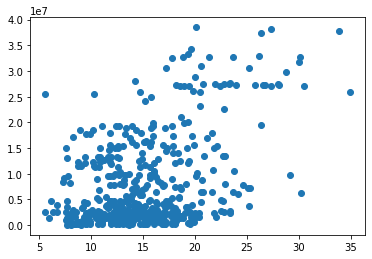

In [331]:
plt.scatter(joint1['PTS'],joint1['2019-20'])
plt.show()

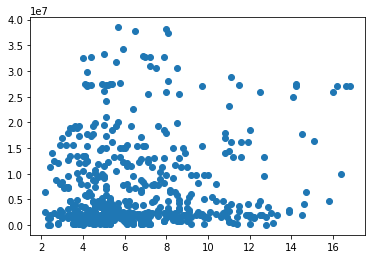

In [332]:
plt.scatter(joint1['REBS'],joint1['2019-20'])

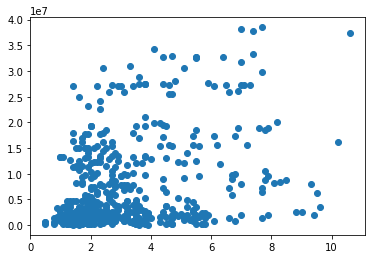

In [333]:
plt.scatter(joint1['AST'],joint1['2019-20'])

In [334]:
joint1["TOTALSTATS"] = joint1['AST']+joint1['BLK']+joint1['PTS']
corrMatrix = joint1.corr()
corrMatrix

,FG%,AST,BLK,PTS,Rk,2019-20,REBS,TOTALSTATS
FG%,1.000000,-0.109210,0.501050,0.204262,-0.065725,0.040996,0.583037,0.193237
AST,-0.109210,1.000000,-0.311092,0.385511,-0.266690,0.333219,-0.271888,0.617973
BLK,0.501050,-0.311092,1.000000,-0.068724,-0.032032,0.033386,0.650182,-0.043741
PTS,0.204262,0.385511,-0.068724,1.000000,-0.358800,0.462266,0.000072,0.956398
Rk,-0.065725,-0.266690,-0.032032,-0.358800,1.000000,-0.842122,-0.086446,-0.392393
2019-20,0.040996,0.333219,0.033386,0.462266,-0.842122,1.000000,0.100133,0.501180
REBS,0.583037,-0.271888,0.650182,0.000072,-0.086446,0.100133,1.000000,-0.014109
TOTALSTATS,0.193237,0.617973,-0.043741,0.956398,-0.392393,0.501180,-0.014109,1.000000


In [335]:
joint1['2019-20'] = joint1['2019-20'].apply(lambda a : a / 1000000)

In [336]:
salAvg = joint1['2019-20'].mean()
joint1['?'] = (joint1['2019-20'] > salAvg)
joint1['?'] = joint1['?'].astype(int)

In [337]:
joint1["?"].values

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [338]:
joint1


,Player,FG%,AST,BLK,PTS,Rk,2019-20,REBS,TOTALSTATS,?
0,Steven Adams\adamsst01,0.592,3.1,1.4,14.7,41.0,25.842697,12.5,19.2,1
1,Bam Adebayo\adebaba01,0.557,5.5,1.4,17.1,253.0,3.454080,10.9,24.0,0
2,LaMarcus Aldridge\aldrila01,0.493,2.6,1.8,20.5,40.0,26.000000,8.0,24.9,1
3,Nickeil Alexander-Walker\alexani01,0.368,5.4,0.5,16.3,270.0,2.964840,5.1,22.2,0
4,Grayson Allen\allengr01,0.466,2.6,0.1,16.5,309.0,2.429400,4.3,19.2,0
...,...,...,...,...,...,...,...,...,...,...
643,Delon Wright\wrighde01,0.462,5.6,0.5,11.6,133.0,9.473684,6.4,17.7,1
644,Thaddeus Young\youngth01,0.448,2.6,0.5,14.9,98.0,12.900000,7.1,18.0,1
645,Trae Young\youngtr01,0.437,9.5,0.1,30.2,180.0,6.273000,4.3,39.8,0
646,Cody Zeller\zelleco01,0.524,2.4,0.7,17.2,87.0,14.471910,11.0,20.3,1


In [339]:
#KNN , ? column is column where players have a 0 for below average and 1 for above average salary

In [340]:
X = joint1.drop(columns = ['Player','2019-20','?'])
y = joint1['?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
X_train, X_test, y_train, y_test

lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)
y_test_enc = lab_enc.fit_transform(y_test)
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn.fit(X_train,y_train_enc)

KNeighborsClassifier(n_neighbors=10)

In [341]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [342]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84  1]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.98      1.00      0.99        48

    accuracy                           0.99       133
   macro avg       0.99      0.99      0.99       133
weighted avg       0.99      0.99      0.99       133



In [343]:
knn.score(X_test, y_test_enc)

0.9924812030075187

In [344]:
#KNN Classification
KNNclass = joint1.drop(columns = ['FG%','Player','BLK','TOTALSTATS','?','Rk'])
KNNclass

,AST,PTS,2019-20,REBS
0,3.1,14.7,25.842697,12.5
1,5.5,17.1,3.454080,10.9
2,2.6,20.5,26.000000,8.0
3,5.4,16.3,2.964840,5.1
4,2.6,16.5,2.429400,4.3
...,...,...,...,...
643,5.6,11.6,9.473684,6.4
644,2.6,14.9,12.900000,7.1
645,9.5,30.2,6.273000,4.3
646,2.4,17.2,14.471910,11.0


In [345]:
X = KNNclass.drop(columns = ['2019-20','REBS'])
 
joint1['target']  = 0
y = joint1['2019-20'] 
y_ = lab_enc.fit_transform(y)


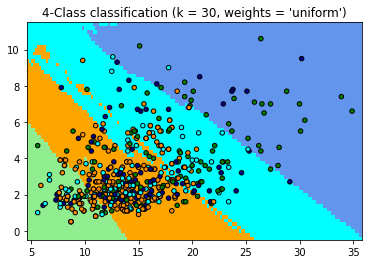

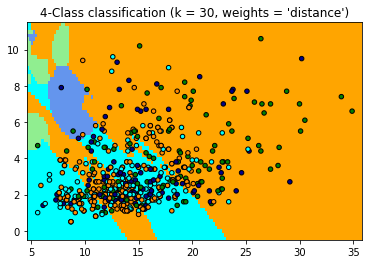

In [353]:

n_neighbors = 30

h = .2  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue','lightgreen'])
cmap_bold = ListedColormap(['darkorange', 'cyan', 'darkblue','green'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y_)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X['PTS'].min() - 1, X['PTS'].max() + 1
    y_min, y_max = X['AST'].min() - 1, X['AST'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    W = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(W)
 #   plt.figure()
#    plt.scatter(X['PTS'], X['2019-20'])
#    plt.xlim(xx.min(), xx.max())
#    plt.ylim(yy.min(), yy.max())
 #   plt.title("Data points")
#    plt.show()
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

     #Plot also the training points
    plt.scatter(X['PTS'], X['AST'], c = y_,  cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))


In [311]:
clf.score(X,y_)

0.8676748582230623

In [351]:
clf.predict(W)

array([103, 103, 103, ...,  60,  60,  60], dtype=int64)

In [181]:
X = joint1["TOTALSTATS"].values.reshape(-1,1)
y = joint1["2019-20"].values

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)
X_train, X_test, y_train, y_test

lin_reg = LinearRegression().fit(X_train, y_train)

print('model coeffs (w): {}'
     .format(lin_reg.coef_))
print('model intercept (b): {:.3f}'
     .format(lin_reg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))

model coeffs (w): [0.7393458]
model intercept (b): -6.713
R-squared score (training): 0.233
R-squared score (test): 0.297


In [70]:
import statsmodels.api as sm
Ols_reg = sm.OLS(y_train,X_train)
results = Ols_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.523
Method:                 Least Squares   F-statistic:                              434.7
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                    1.20e-65
Time:                        00:15:54   Log-Likelihood:                         -1373.8
No. Observations:                 396   AIC:                                      2750.
Df Residuals:                     395   BIC:                                      2754.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5172      0.025     20.851      0.000       0.468       0.566
==============================================================================
Omnibus:                       80.116   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.164
Skew:                           1.294   Prob(JB):                     6.62e-28
Kurtosis:                       3.941   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.6466165413533834